In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\Approlabs\new\Preprocessed_data.csv")
df.head(2)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada


In [2]:
df.drop(columns=["img_s","img_m","img_l","location","city","state"], inplace=True)
df.isnull().sum()


Unnamed: 0                 0
user_id                    0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
Summary                    0
Language                   0
Category                   0
country                35374
dtype: int64

In [3]:
df["book_author"].fillna("unknown", inplace= True)
df["country"].fillna("unknown", inplace=True)

C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_23436\1242473355.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["book_author"].fillna("unknown", inplace= True)
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_23436\1242473355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [17]:
df.isnull().sum()

Unnamed: 0             0
user_id                0
age                    0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
Summary                0
Language               0
Category               0
country                0
dtype: int64

In [19]:
df["user_id"] = df["user_id"].astype(int)
df["age"] = df["age"].astype(int)
df["rating"] = df["rating"].astype(float)
df["user_id"] = df["user_id"].astype(int)

In [20]:
df["Language"].value_counts()

Language
en       618505
9        398937
de         5725
es         3425
fr         3223
it          732
nl          238
da          119
pt          100
ca           49
ru           23
gl           13
no           13
ms           11
la            9
zh-CN         9
ja            6
el            6
th            6
ga            4
ar            3
vi            3
eo            2
zh-TW         2
gd            2
ro            2
fa            2
hi            1
cy            1
tl            1
pl            1
ko            1
sv            1
Name: count, dtype: int64

In [21]:
lang_counts = df['Language'].value_counts()

common_langs = lang_counts[lang_counts >= 1000].index

df['Language'] = df['Language'].apply(lambda x: x if x in common_langs else 'others')


In [22]:
df["Language"].value_counts()

Language
en        618505
9         398937
de          5725
es          3425
fr          3223
others      1360
Name: count, dtype: int64

In [23]:
df["Language"] = df["Language"].replace({
    "en" : "English",
    "de" : "German",
    "es" : "Spanish",
    "fr" : "French",
    "9" : "Unknown"
})

In [24]:
df["Language"].value_counts()

Language
English    618505
Unknown    398937
German       5725
Spanish      3425
French       3223
others       1360
Name: count, dtype: int64

In [26]:
df["year_of_publication"]= df["year_of_publication"].astype(int)
df.head(3)

,Unnamed: 0,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,country
0,0,2,18,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,English,['Social Science'],usa
1,1,8,34,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",English,['Actresses'],canada
2,2,11400,49,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",English,['Actresses'],canada


In [27]:
df["country"].value_counts()

country
usa                     745840
canada                   92957
unknown                  35375
united kingdom           32011
germany                  27655
                         ...  
victoria, australia          1
lebanon                      1
x                            1
china"                       1
päijät-häme, finland         1
Name: count, Length: 414, dtype: int64

In [30]:
countries_counts = df['country'].value_counts()
countries = countries_counts[countries_counts >= 1000].index

df['country'] = df['country'].apply(lambda x: x if x in countries else 'others')


In [31]:
df["country"].value_counts()

country
usa               745840
canada             92957
unknown            35375
united kingdom     32011
germany            27655
australia          18217
others             15523
spain              14774
france             10632
portugal            6975
new zealand         5557
malaysia            5083
netherlands         4972
switzerland         4178
italy               3472
austria             2803
iran                1650
finland             1189
romania             1168
singapore           1144
Name: count, dtype: int64

In [34]:
df['Category'] = df['Category'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df.head(4)

,Unnamed: 0,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,country
0,0,2,18,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,English,Social Science,usa
1,1,8,34,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",English,Actresses,canada
2,2,11400,49,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",English,Actresses,canada
3,3,11676,34,0002005018,8.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",English,Actresses,unknown


In [36]:
df.to_csv("cleaned_books_dataset.csv", index=False)


# EDA

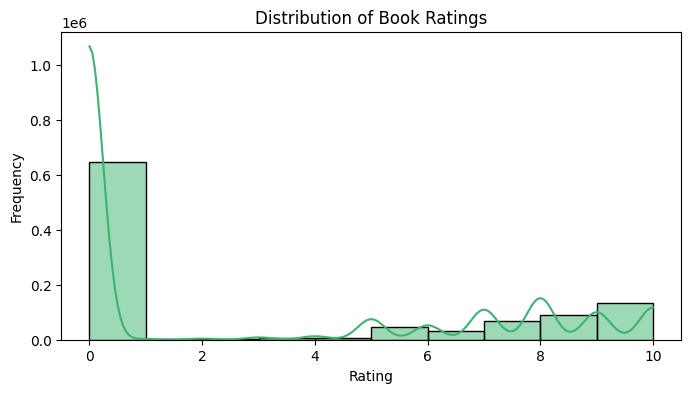

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=10, kde=True, color='mediumseagreen')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


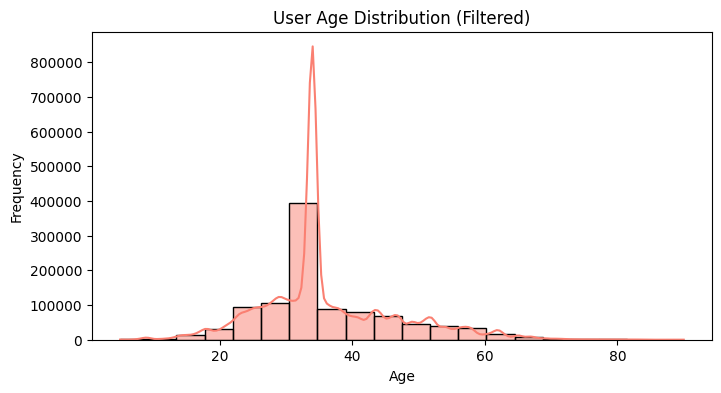

In [41]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['age'] <= 90]['age'], bins=20, kde=True, color='salmon')
plt.title("User Age Distribution (Filtered)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_24124\3175387484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')


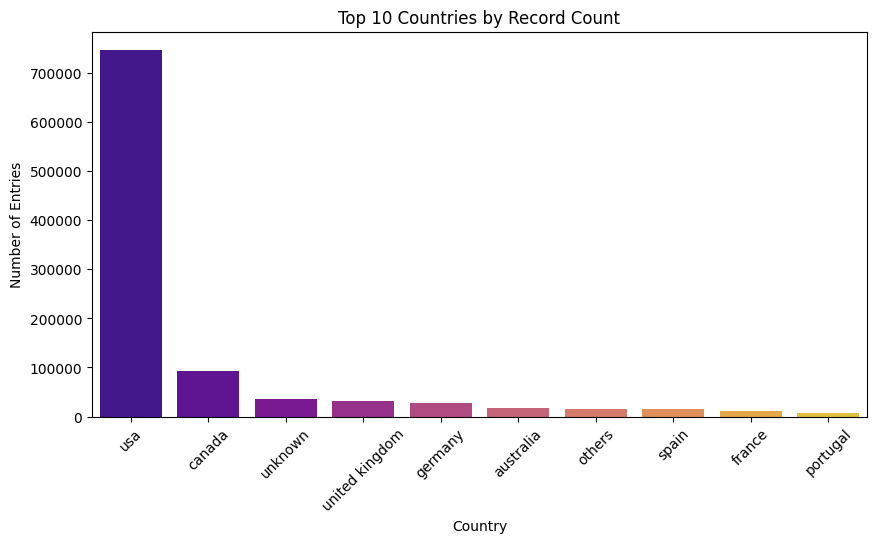

In [42]:
plt.figure(figsize=(10,5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')
plt.title("Top 10 Countries by Record Count")
plt.ylabel("Number of Entries")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_24124\4002554111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_rated_books.values, y=most_rated_books.index, palette='Blues_d')


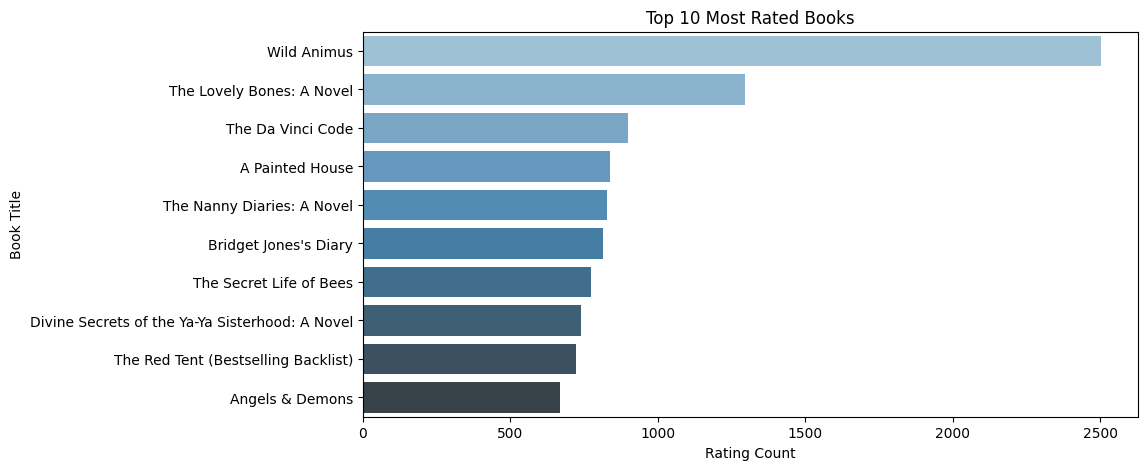

In [43]:
most_rated_books = df['book_title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=most_rated_books.values, y=most_rated_books.index, palette='Blues_d')
plt.title("Top 10 Most Rated Books")
plt.xlabel("Rating Count")
plt.ylabel("Book Title")
plt.show()


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_24124\1906481861.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_filtered.head(15).values, y=avg_rating_filtered.head(15).index, palette='coolwarm')
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_24124\1906481861.py:24: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YAMINI RAVICHANDRAN\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


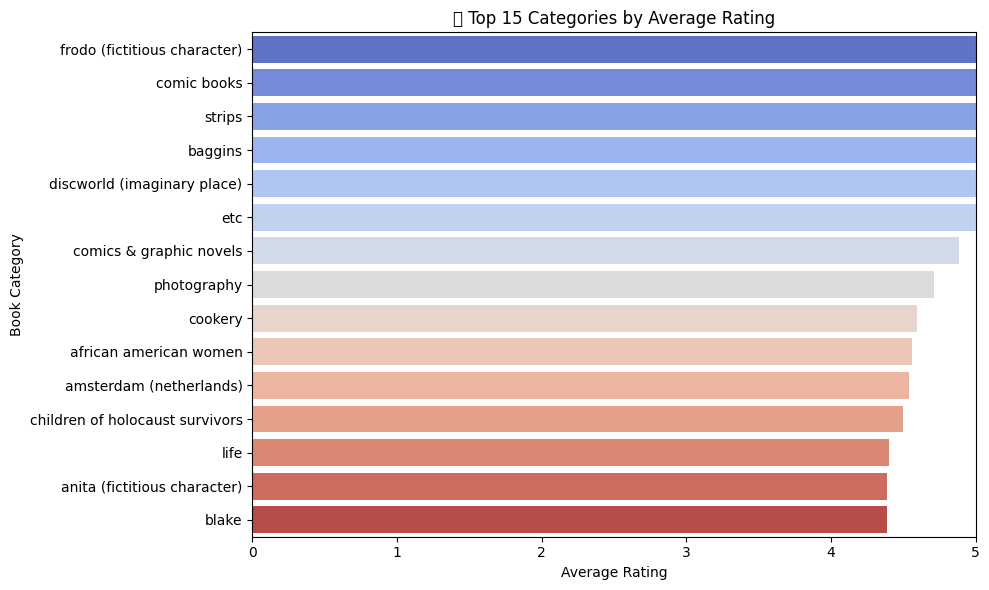

In [ ]:
df['Category'] = df['Category'].apply(lambda x: [i.lower().strip() for i in x if isinstance(i, str)] if isinstance(x, list) else [])

df_exploded = df.explode('Category')

df_exploded = df_exploded[df_exploded['Category'].notnull() & (df_exploded['Category'] != '')]

avg_rating_by_cat = df_exploded.groupby('Category')['rating'].mean().sort_values(ascending=False)

cat_counts = df_exploded['Category'].value_counts()
avg_rating_filtered = avg_rating_by_cat[cat_counts >= 50]

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_filtered.head(15).values, y=avg_rating_filtered.head(15).index, palette='coolwarm')
plt.title("⭐ Top 15 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Book Category")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


# Content Based Filtering

In [ ]:
!pip install pandas scikit-learn


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\Approlabs\new\cleaned_books_dataset.csv")

for col in ["book_title", "book_author", "Category", "Summary"]:
    df[col] = df[col].fillna("").astype(str).str.lower()

df["metadata"] = df["book_title"] + " " + df["book_author"] + " " + df["Category"] + " " + df["Summary"]
df["clean_title"] = df["book_title"].str.strip()

df = df.drop_duplicates(subset=["metadata"])
df = df.reset_index(drop=True)

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["metadata"])

title_to_index = pd.Series(df.index, index=df["clean_title"]).drop_duplicates()

def recommend_books(title, top_n=5, show_scores=False):
    title = title.lower().strip()

    if title not in title_to_index:
        return f"❌ Book titled '{title}' not found in the dataset."

    idx = title_to_index[title]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    query_vec = tfidf_matrix[idx]
    sim_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()

    sim_indices = [i for i in sim_scores.argsort()[::-1] if i < len(df) and i != idx][:top_n]

    results = df.iloc[sim_indices][["book_title", "book_author"]].copy()
    if show_scores:
        results["similarity"] = [round(sim_scores[i], 3) for i in sim_indices]

    return results.reset_index(drop=True)

print(recommend_books("Wild Animus", top_n=5, show_scores=True))


                                          book_title            book_author  \
0                               wild land, wild love           connie mason   
1  animus and anima in fairy tales (studies in ju...  marie-luise von franz   
2  animus aeternus: exploring the inner masculine...    deldon anne mcneely   
3                          inside the wild wild west              r. cangey   
4                         wild bells to the wild sky          laurie mcbain   

   similarity  
0       0.225  
1       0.224  
2       0.209  
3       0.206  
4       0.199  


In [3]:
!pip install pandas 

  Using cached pandas-2.3.0-cp310-cp310-win_amd64.whl (11.1 MB)
     ---------------------------------------- 0.0/509.2 kB ? eta -:--:--
     --- ----------------------------------- 51.2/509.2 kB 1.3 MB/s eta 0:00:01
     -------- ----------------------------- 112.6/509.2 kB 1.3 MB/s eta 0:00:01
     -------- ----------------------------- 112.6/509.2 kB 1.3 MB/s eta 0:00:01
     ---------------- --------------------- 225.3/509.2 kB 1.3 MB/s eta 0:00:01
     ---------------- --------------------- 225.3/509.2 kB 1.3 MB/s eta 0:00:01
     ---------------------------------- --- 460.8/509.2 kB 1.7 MB/s eta 0:00:01
     ----------------------------------- -- 481.3/509.2 kB 1.4 MB/s eta 0:00:01
     ------------------------------------ - 491.5/509.2 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 509.2/509.2 kB 1.2 MB/s eta 0:00:00
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scikit-surprise



     ---------------------------------------- 0.0/154.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.4 kB 660.6 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/154.4 kB 544.7 kB/s eta 0:00:01
     ------------------- ----------------- 81.9/154.4 kB 651.6 kB/s eta 0:00:01
     -------------------------- --------- 112.6/154.4 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 154.4/154.4 kB 658.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/4


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install numpy==1.24.4 --force-reinstall


     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/14.8 MB 1.0 MB/s eta 0:00:15
     --------------------------------------- 0.1/14.8 MB 901.1 kB/s eta 0:00:17
      --------------------------------------- 0.2/14.8 MB 1.3 MB/s eta 0:00:12
      --------------------------------------- 0.3/14.8 MB 1.5 MB/s eta 0:00:10
     - -------------------------------------- 0.4/14.8 MB 1.5 MB/s eta 0:00:10
     - -------------------------------------- 0.4/14.8 MB 1.5 MB/s eta 0:00:10
     - -------------------------------------- 0.5/14.8 MB 1.3 MB/s eta 0:00:11
     - -------------------------------------- 0.6/14.8 MB 1.4 MB/s eta 0:00:11
     - -------------------------------------- 0.6/14.8 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.7/14.8 MB 1.5 MB/s eta 0:00:10
     - -------------------------------------- 0.7/14.8 MB 1.3 MB/

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\YAMINI RAVICHANDRAN\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-13e2df515630b4a41f92893938845698.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

df = pd.read_csv("cleaned_books_dataset.csv")

df = df[['user_id', 'book_title', 'rating']].dropna()
df['user_id'] = df['user_id'].astype(str)
df['book_title'] = df['book_title'].astype(str).str.lower().str.strip()
df['rating'] = df['rating'].astype(float)
df = df.drop_duplicates(subset=['user_id', 'book_title'])

top_books = df['book_title'].value_counts().nlargest(10000).index
df = df[df['book_title'].isin(top_books)]

user_item_matrix = df.pivot_table(index='user_id', columns='book_title', values='rating')
user_item_matrix_filled = user_item_matrix.fillna(0)

book_titles = user_item_matrix_filled.columns
book_matrix = user_item_matrix_filled.T.values
title_to_index_cf = pd.Series(range(len(book_titles)), index=book_titles)

def recommend_books_cf(title, top_n=5, show_scores=False):
    title = title.lower().strip()
    
    if title not in title_to_index_cf:
        close_matches = get_close_matches(title, title_to_index_cf.index, n=1, cutoff=0.6)
        if not close_matches:
            return f"❌ Book titled '{title}' not found in collaborative data."
        title = close_matches[0]
        print(f"🔍 Closest match found: '{title}'")

    idx = title_to_index_cf[title]
    book_vector = book_matrix[idx].reshape(1, -1)
    sim_scores = cosine_similarity(book_vector, book_matrix).flatten()

    sim_indices = sim_scores.argsort()[::-1]
    sim_indices = [i for i in sim_indices if i != idx][:top_n]

    results = pd.DataFrame({
        "book_title": book_titles[sim_indices].values,
        "similarity": [round(sim_scores[i], 3) for i in sim_indices]
    })

    return results.reset_index(drop=True) if show_scores else results[["book_title"]].reset_index(drop=True)

print(recommend_books_cf("Wild Animus", top_n=5, show_scores=True))


                                          book_title  similarity
0  earth, air, fire, and water: more techniques o...       0.070
1                                   the necronomicon       0.066
2                                             catkin       0.065
3  hitchhik gd galaxy (hitchhiker's trilogy (pape...       0.059
4   postmarked yesteryear: 30 rare holiday postcards       0.058


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import numpy as np


df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\Approlabs\new\cleaned_books_dataset.csv")

for col in ["book_title", "book_author", "Category", "Summary"]:
    df[col] = df[col].fillna("").astype(str).str.lower()

df["metadata"] = df["book_title"] + " " + df["book_author"] + " " + df["Category"] + " " + df["Summary"]
df["clean_title"] = df["book_title"].str.strip()

df = df.drop_duplicates(subset=["metadata"])
df = df.reset_index(drop=True)


tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["metadata"])

title_to_index = pd.Series(df.index, index=df["clean_title"]).drop_duplicates()


def recommend_books(title, top_n=5, show_scores=False):
    title = title.lower().strip()

    if title not in title_to_index:
        return pd.DataFrame(columns=["book_title", "book_author", "similarity"])  # return empty

    idx = title_to_index[title]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    query_vec = tfidf_matrix[idx]
    sim_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    sim_indices = [i for i in sim_scores.argsort()[::-1] if i != idx][:top_n]

    results = df.iloc[sim_indices][["book_title", "book_author"]].copy()
    if show_scores:
        results["similarity"] = [round(sim_scores[i], 3) for i in sim_indices]

    return results.reset_index(drop=True)

if 'user_id' in df.columns and 'rating' in df.columns:
    df_ratings = df[['user_id', 'book_title', 'rating']].dropna()
    df_ratings['user_id'] = df_ratings['user_id'].astype(str)
    df_ratings['book_title'] = df_ratings['book_title'].str.lower().str.strip()
    df_ratings['rating'] = df_ratings['rating'].astype(float)

    test_users = df_ratings['user_id'].value_counts().loc[lambda x: x > 5].index[:50]

    def evaluate_content_model(top_n=5):
        hits, total_preds, total_true = 0, 0, 0

        for user in tqdm(test_users):
            user_data = df_ratings[df_ratings['user_id'] == user]
            history = user_data.sample(frac=0.6, random_state=42)
            test_set = user_data.drop(history.index)

            liked_books = test_set[test_set['rating'] >= 4]['book_title'].tolist()
            if not liked_books:
                continue

            recommendations = []
            for book in history['book_title']:
                recs = recommend_books(book, top_n=top_n)
                recommendations.extend(recs['book_title'].tolist())

            recommendations = list(set(recommendations))

            hits += len(set(recommendations) & set(liked_books))
            total_preds += len(recommendations)
            total_true += len(liked_books)

        precision = hits / total_preds if total_preds else 0
        recall = hits / total_true if total_true else 0

        print("📊 Content-Based Filtering Evaluation")
        print(f"Precision@{top_n}: {precision:.3f}")
        print(f"Recall@{top_n}: {recall:.3f}")
        print("-" * 40)

    evaluate_content_model(top_n=5)
else:
    print("⚠️ No user_id or rating column found to evaluate the model.")


100%|██████████| 50/50 [1:02:55<00:00, 75.51s/it] 

📊 Content-Based Filtering Evaluation
Precision@5: 0.009
Recall@5: 0.163
----------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
from collections import defaultdict
from tqdm import tqdm

df = pd.read_csv("cleaned_books_dataset.csv")

df = df[['user_id', 'book_title', 'rating']].dropna()
df['user_id'] = df['user_id'].astype(str)
df['book_title'] = df['book_title'].astype(str).str.lower().str.strip()
df['rating'] = df['rating'].astype(float)
df = df.drop_duplicates(subset=['user_id', 'book_title'])

top_books = df['book_title'].value_counts().nlargest(10000).index
df = df[df['book_title'].isin(top_books)]

user_item_matrix = df.pivot_table(index='user_id', columns='book_title', values='rating')
user_item_matrix_filled = user_item_matrix.fillna(0)

book_titles = user_item_matrix_filled.columns
book_matrix = user_item_matrix_filled.T.values
title_to_index_cf = pd.Series(range(len(book_titles)), index=book_titles)

def recommend_books_cf(title, top_n=5, show_scores=False):
    title = title.lower().strip()
    
    if title not in title_to_index_cf:
        close_matches = get_close_matches(title, title_to_index_cf.index, n=1, cutoff=0.6)
        if not close_matches:
            return f"❌ Book titled '{title}' not found in collaborative data."
        title = close_matches[0]
        print(f"🔍 Closest match found: '{title}'")

    idx = title_to_index_cf[title]
    book_vector = book_matrix[idx].reshape(1, -1)
    sim_scores = cosine_similarity(book_vector, book_matrix).flatten()

    sim_indices = sim_scores.argsort()[::-1]
    sim_indices = [i for i in sim_indices if i != idx][:top_n]

    results = pd.DataFrame({
        "book_title": book_titles[sim_indices].values,
        "similarity": [round(sim_scores[i], 3) for i in sim_indices]
    })

    return results.reset_index(drop=True) if show_scores else results[["book_title"]].reset_index(drop=True)

print(recommend_books_cf("Wild Animus", top_n=5, show_scores=True))

def evaluate_cf(top_k=5, sample_size=50):
    precision_total, recall_total = 0, 0
    user_sample = df['user_id'].value_counts().head(500).index.tolist()

    for user in tqdm(user_sample[:sample_size], desc="Evaluating CF"):
        user_data = df[df['user_id'] == user]
        if len(user_data) < 2:
            continue
        liked_books = user_data.sort_values('rating', ascending=False)['book_title'].values[:1]
        actual_books = set(user_data['book_title'].values[1:])

        if not actual_books:
            continue

        recs = []
        for book in liked_books:
            res = recommend_books_cf(book, top_n=top_k)
            if isinstance(res, pd.DataFrame):
                recs += res['book_title'].values.tolist()

        recs = set(recs)
        hits = recs & actual_books

        precision_total += len(hits) / top_k
        recall_total += len(hits) / len(actual_books)

    precision = precision_total / sample_size
    recall = recall_total / sample_size

    print("\n📊 Collaborative Filtering Evaluation")
    print(f"Precision@{top_k}: {precision:.3f}")
    print(f"Recall@{top_k}: {recall:.3f}")
    print("-" * 40)

evaluate_cf(top_k=5)


                                          book_title  similarity
0  earth, air, fire, and water: more techniques o...       0.070
1                                   the necronomicon       0.066
2                                             catkin       0.065
3  hitchhik gd galaxy (hitchhiker's trilogy (pape...       0.059
4   postmarked yesteryear: 30 rare holiday postcards       0.058


Evaluating CF: 100%|██████████| 50/50 [03:48<00:00,  4.56s/it]


📊 Collaborative Filtering Evaluation
Precision@5: 0.540
Recall@5: 0.003
----------------------------------------


In [2]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.0-cp310-cp310-win_amd64.whl (10.7 MB)



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install tqdm


     ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
     --------------- ------------------------ 30.7/78.5 kB ? eta -:--:--
     ------------------- ------------------ 41.0/78.5 kB 653.6 kB/s eta 0:00:01
     ----------------------------- -------- 61.4/78.5 kB 812.7 kB/s eta 0:00:01
     ----------------------------- -------- 61.4/78.5 kB 812.7 kB/s eta 0:00:01
     -------------------------------------- 78.5/78.5 kB 437.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

df = pd.read_csv("cleaned_books_dataset.csv")

for col in ["book_title", "book_author", "Category", "Summary"]:
    df[col] = df[col].fillna("").astype(str).str.lower()

df["metadata"] = df["book_title"] + " " + df["book_author"] + " " + df["Category"] + " " + df["Summary"]
df["clean_title"] = df["book_title"].str.strip()
df = df.drop_duplicates(subset=["metadata"]).reset_index(drop=True)

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["metadata"])
content_titles = df["clean_title"].tolist()

title_to_index_cb = pd.Series(df.index, index=df["clean_title"]).drop_duplicates()

df_cf = df[["user_id", "book_title", "rating"]].dropna()
df_cf["rating"] = df_cf["rating"].astype(float)
df_cf["book_title"] = df_cf["book_title"].str.strip()
df_cf = df_cf.drop_duplicates(subset=["user_id", "book_title"])

top_books = df_cf["book_title"].value_counts().nlargest(2000).index
df_cf = df_cf[df_cf["book_title"].isin(top_books)]

user_item_matrix = df_cf.pivot_table(index="user_id", columns="book_title", values="rating").fillna(0)

cf_titles = user_item_matrix.columns
cf_matrix = user_item_matrix.T.values
title_to_index_cf = pd.Series(range(len(cf_titles)), index=cf_titles)

def hybrid_recommend(title, top_n=5, w_content=0.5, w_cf=0.5):
    title = title.lower().strip()

    content_idx = title_to_index_cb.get(title)
    cf_idx = title_to_index_cf.get(title)

    if content_idx is None and cf_idx is None:
        close_matches = get_close_matches(title, title_to_index_cb.index.union(title_to_index_cf.index), n=1)
        return f"❌ Book titled '{title}' not found. Closest match: {close_matches[0] if close_matches else 'None'}"

    if content_idx is not None:
        query_vec = tfidf_matrix[content_idx]
        content_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    else:
        content_scores = np.zeros(len(df))

    if cf_idx is not None:
        book_vector = cf_matrix[cf_idx].reshape(1, -1)
        cf_scores = cosine_similarity(book_vector, cf_matrix).flatten()
        aligned_cf_scores = pd.Series(cf_scores, index=cf_titles)
        aligned_cf_scores_full = df["book_title"].map(aligned_cf_scores).fillna(0).values
    else:
        aligned_cf_scores_full = np.zeros(len(df))

    hybrid_scores = w_content * content_scores + w_cf * aligned_cf_scores_full

    df["hybrid_score"] = hybrid_scores
    result_df = df[df["book_title"].str.strip() != title].sort_values("hybrid_score", ascending=False)
    
    return result_df[["book_title", "book_author", "hybrid_score"]].head(top_n).reset_index(drop=True)

print(hybrid_recommend("Wild Animus", top_n=5))


                                          book_title            book_author  \
0                               wild land, wild love           connie mason   
1  animus and anima in fairy tales (studies in ju...  marie-luise von franz   
2  animus aeternus: exploring the inner masculine...    deldon anne mcneely   
3                          inside the wild wild west              r. cangey   
4                         wild bells to the wild sky          laurie mcbain   

   hybrid_score  
0      0.112638  
1      0.112144  
2      0.104523  
3      0.102852  
4      0.099369  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from tqdm import tqdm

df = pd.read_csv("cleaned_books_dataset.csv")

for col in ["book_title", "book_author", "Category", "Summary"]:
    df[col] = df[col].fillna("").astype(str).str.lower().str.strip()

df["metadata"] = df["book_title"] + " " + df["book_author"] + " " + df["Category"] + " " + df["Summary"]
df["clean_title"] = df["book_title"]

tfidf = TfidfVectorizer(stop_words="english", max_features=10000)
tfidf_matrix = tfidf.fit_transform(df["metadata"])
title_to_index_cb = pd.Series(df.index, index=df["clean_title"]).drop_duplicates()

df_cf = df[["user_id", "book_title", "rating"]].dropna()
df_cf["user_id"] = df_cf["user_id"].astype(str)
df_cf["book_title"] = df_cf["book_title"].str.lower().str.strip()
df_cf["rating"] = df_cf["rating"].astype(float)
df_cf = df_cf.drop_duplicates(subset=["user_id", "book_title"])

top_users = df_cf["user_id"].value_counts().nlargest(5000).index
top_books = df_cf["book_title"].value_counts().nlargest(3000).index
df_cf = df_cf[df_cf["user_id"].isin(top_users) & df_cf["book_title"].isin(top_books)]

user_item_matrix = df_cf.pivot_table(index="user_id", columns="book_title", values="rating").fillna(0)
cf_titles = user_item_matrix.columns
cf_matrix = user_item_matrix.T.values
title_to_index_cf = pd.Series(range(len(cf_titles)), index=cf_titles)

def hybrid_recommend(title, top_n=5, alpha=0.5):
    title = title.lower().strip()

    if title not in title_to_index_cb or title not in title_to_index_cf:
        return f"❌ Book titled '{title}' not found in both models."

    idx_cb = title_to_index_cb[title]
    query_vec_cb = tfidf_matrix[idx_cb]
    sim_cb = cosine_similarity(query_vec_cb, tfidf_matrix).flatten()

    idx_cf = title_to_index_cf[title]
    query_vec_cf = cf_matrix[idx_cf].reshape(1, -1)
    sim_cf = cosine_similarity(query_vec_cf, cf_matrix).flatten()

    n = min(len(sim_cb), len(sim_cf))
    sim_cb = sim_cb[:n]
    sim_cf = sim_cf[:n]
    hybrid_score = alpha * sim_cb + (1 - alpha) * sim_cf

    top_indices = np.argsort(hybrid_score)[::-1]
    top_indices = [i for i in top_indices if i != idx_cf][:top_n]

    recommended_titles = [cf_titles[i] for i in top_indices]
    similarities = [round(hybrid_score[i], 3) for i in top_indices]

    return pd.DataFrame({
        "Recommended Book": recommended_titles,
        "Hybrid Score": similarities
    })

print(hybrid_recommend("Wild Animus", top_n=5))

def evaluate_hybrid(recommender_fn, sample_titles, k=5):
    precision_list, recall_list = [], []

    for title in tqdm(sample_titles[:50]):
        try:
            true_users = set(df_cf[df_cf["book_title"] == title]["user_id"])
            if len(true_users) == 0:
                continue

            recs = recommender_fn(title, top_n=k)
            if isinstance(recs, str):  # skip if error
                continue

            rec_titles = set(recs["Recommended Book"])
            user_hits = df_cf[df_cf["book_title"].isin(rec_titles)]["user_id"]
            user_hits = set(user_hits)

            hits = len(user_hits & true_users)
            precision = hits / k
            recall = hits / len(true_users)

            precision_list.append(precision)
            recall_list.append(recall)

        except:
            continue

    print("\n📊 Hybrid Model Evaluation")
    print(f"Precision@{k}: {round(np.mean(precision_list), 3)}")
    print(f"Recall@{k}: {round(np.mean(recall_list), 3)}")
    print("-" * 40)

evaluate_hybrid(hybrid_recommend, df["book_title"].unique(), k=5)


                                    Recommended Book  Hybrid Score
0                                  reversible errors         0.560
1                                   the edge of town         0.559
2                             novocento, un monologo         0.555
3  grave secrets (temperance brennan novel (hardc...         0.553
4                mariel of redwall (redwall, book 4)         0.552


100%|██████████| 50/50 [04:35<00:00,  5.50s/it]


📊 Hybrid Model Evaluation
Precision@5: 8.844
Recall@5: 0.289
----------------------------------------
